In [4]:
# I/O Handling
import cv2
# Video Handling/ Handling bounding boxes / output
import supervision as sv
# Model Handling
import ultralytics
import time
# Load the pre-trained model for face detection
model = ultralytics.YOLO('./model/best_face_detector.pt')

# Bounding box and label annotator
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

def detect_face(image):
    # Make predictions
    results = model(image)[0]
    # Extract detections
    detections = sv.Detections.from_ultralytics(results)
    # Annotates the boxes with labels 
    annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    return annotated_image

In [5]:
import cv2
from PIL import Image, ImageTk
import tkinter as tk
import time

def show_frame():
    ret, frame = cap.read()
    if ret:
        frame = detect_face(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, show_frame)
    else:
        print("Error: Empty frame received")

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

print(f"Backend: {cap.getBackendName()}")
print(f"Format: {cap.get(cv2.CAP_PROP_FORMAT)}")
print(f"FPS: {cap.get(cv2.CAP_PROP_FPS)}")
print(f"Frame Width: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
print(f"Frame Height: {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")

time.sleep(2)

root = tk.Tk()
lmain = tk.Label(root)
lmain.pack()

show_frame()
root.mainloop()

cap.release()

Backend: MSMF
Format: -1.0
FPS: 30.0
Frame Width: 640.0
Frame Height: 480.0

0: 480x640 1 face, 248.0ms
Speed: 17.1ms preprocess, 248.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 183.7ms
Speed: 2.0ms preprocess, 183.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 169.5ms
Speed: 1.0ms preprocess, 169.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 159.3ms
Speed: 3.0ms preprocess, 159.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 159.2ms
Speed: 1.9ms preprocess, 159.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 166.2ms
Speed: 2.0ms preprocess, 166.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 155.1ms
Speed: 2.0ms preprocess, 155.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 159.6ms
Speed: 1.0ms 

In [3]:

cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

ret, frame = cap.read()
if ret:
    frame = detect_face(frame)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ret, buffer = cv2.imencode('.jpg', frame)
    frame = buffer.tobytes()
    
else:
    print("Error: Empty frame received")
        
cap.release()


0: 480x640 1 face, 159.1ms
Speed: 2.0ms preprocess, 159.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [32]:
results = model(frame)


0: 480x640 1 face, 176.7ms
Speed: 3.0ms preprocess, 176.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [34]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9265])
data: tensor([[208.6723, 125.5254, 381.5344, 363.6964,   0.9265,   0.0000]])
id: None
is_track: False
orig_shape: (480, 640)
shape: torch.Size([1, 6])
xywh: tensor([[295.1033, 244.6109, 172.8621, 238.1710]])
xywhn: tensor([[0.4611, 0.5096, 0.2701, 0.4962]])
xyxy: tensor([[208.6723, 125.5254, 381.5344, 363.6964]])
xyxyn: tensor([[0.3261, 0.2615, 0.5961, 0.7577]])

In [22]:
results[0].bo

IndexError: list index out of range

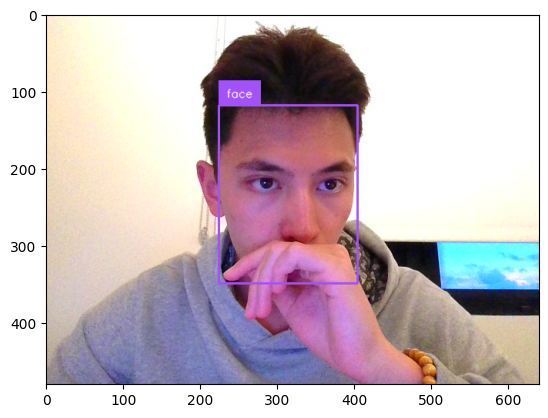

In [41]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [36]:
cap.release()